# <center>**Домашнее задание Модуль 1**</center>

In [39]:
# Импортируем библиотеки, которые могут нам понадобится в работе
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.figure_factory as ff
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
# Прочитаем файл и выведем первые 5 строк
churn_data = pd.read_csv('churn.csv')
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


## <center>**1 вопрос**</center>
Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению.

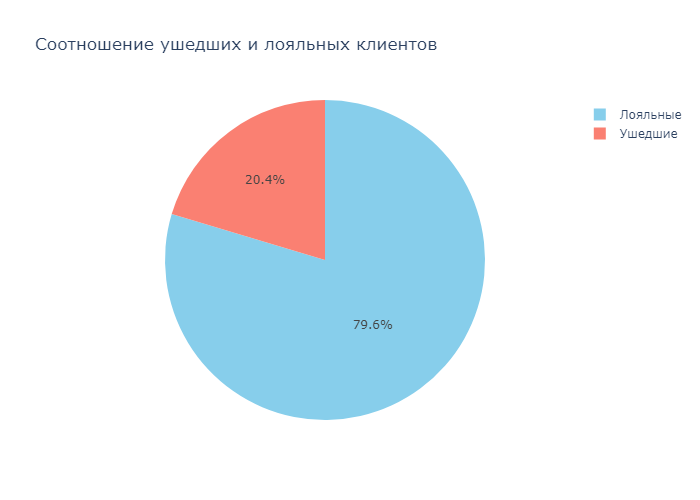

In [41]:
# Считаем количество ушедших и лояльных клиентов
status_counts = churn_data['Exited'].value_counts().rename({0: 'Лояльные', 1: 'Ушедшие'})

# Создаем круговую диаграмму с заданной цветовой гаммой
fig = px.pie(
    values=status_counts,
    names=status_counts.index,
    title='Соотношение ушедших и лояльных клиентов',
    color=status_counts.index,
    color_discrete_sequence=['skyblue', 'salmon']  # Задаем цветовую гамму
)

# Отображаем график
fig.show('png')

**Вывод по графику**

На графике представлено соотношение ушедших и лояльных клиентов, где ушедшие клиенты составляют 20.38%, а лояльные - 79.62%. Это говорит о большом разнообразии клиентов, что может быть важным фактором для построения стратегии развития банка.

## <center>**2 вопрос**</center>
Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

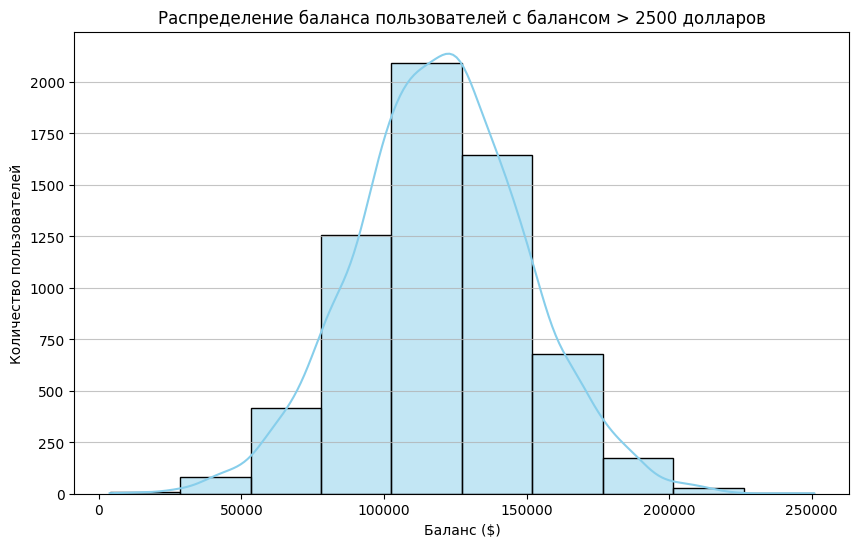

In [42]:
# Фильтруем клиентов с балансом больше 2500
filtered_data = churn_data[churn_data['Balance'] > 2500]

# Строим гистограмму для наглядного отображения распределения
plt.figure(figsize=(10, 6))
sns.histplot(filtered_data['Balance'], bins=10, kde=True, color='skyblue')
plt.title('Распределение баланса пользователей с балансом > 2500 долларов')
plt.xlabel('Баланс ($)')
plt.ylabel('Количество пользователей')
plt.grid(axis='y', alpha=0.75)
plt.show('png')

**Вывод по графику**
Большинство клиентов имеют сбережения от 75 до 150 тысяч долларов (в среднем - 120), что указывает на большое число состоятельных клиентов, которым могут быть интересны премиум-услуги или сервисы.

## <center>**3 вопрос**</center>
Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

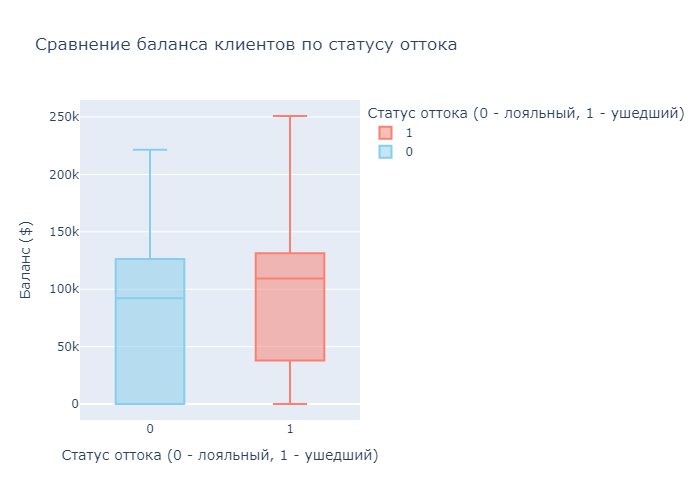

In [43]:
# Строим boxplot для анализа распределения баланса
fig = px.box(churn_data, x='Exited', y='Balance', 
             title='Сравнение баланса клиентов по статусу оттока',
             labels={'Exited': 'Статус оттока (0 - лояльный, 1 - ушедший)', 'Balance': 'Баланс ($)'},
             color='Exited', 
             color_discrete_sequence=['salmon', 'skyblue'])

# Обновляем оформление графика
fig.show('png')

**Вывод**

На графике представлено распределение баланса клиента в разрезе признака оттока. Ушедшие клиенты имеют суммы на накопительном счёте на среднем 105 тысяч долларов, а лояльные клиенты - 120. 
Необходим дальнейший анализ данных, чтобы установить причину ухода клиентов.

Вероятные причины оттока клиентов:
- Недостаток услуг: Ушедшие клиенты могут не получать достаточного количества услуг или продуктов, которые они ожидают от банка. Например, отсутствие кредитной карты или низкое количество предлагаемых продуктов.
- Комиссии и сборы: Высокие комиссии за обслуживание или скрытые платежи могут отпугнуть клиентов.
- Качество обслуживания: Низкий уровень обслуживания клиентов или недостаточная поддержка может привести к тому, что клиенты ищут более выгодные предложения у конкурентов.
- Финансовая ситуация: Ушедшие клиенты могут столкнуться с финансовыми трудностями, что приводит к снижению баланса.
- Отсутствие персонализированных предложений: Если банк не предлагает персонализированные услуги или не учитывает потребности клиентов, это может привести к потере интереса.





## <center>**4 вопрос**</center>
Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

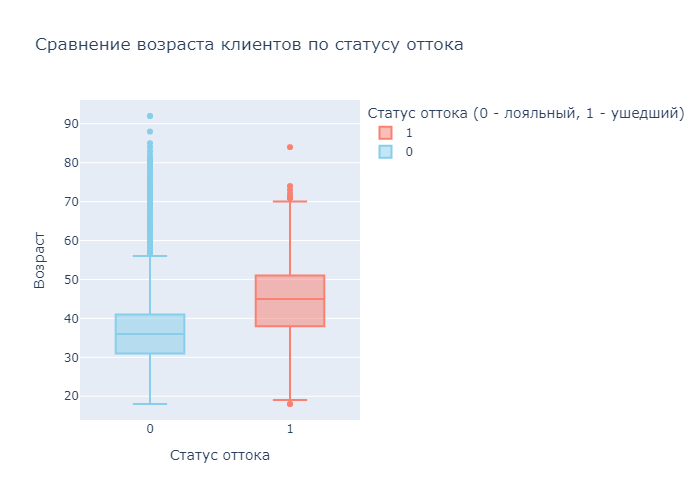

In [44]:
# Строим boxplot для анализа распределения возраста
fig = px.box(churn_data, x='Exited', y='Age', 
             title='Сравнение возраста клиентов по статусу оттока',
             labels={'Exited': 'Статус оттока (0 - лояльный, 1 - ушедший)', 'Age': 'Возраст'},
             color='Exited', 
             color_discrete_sequence=['salmon', 'skyblue'])

# Обновляем оформление графика
fig.update_layout(xaxis_title='Статус оттока', yaxis_title='Возраст')
fig.show('png')

**Вывод**

На графике представлено распределение возраста клиента в разрезе признака оттока. Ушедшие клиенты имеют возраст в среднем 45 лет, а лояльные клиенты - 36. Банку стоить обратить внимание на клиентов в возрастной группе от 45 до 51 года, вероятно, активные трудоспособные клиенты не получают нужных услуг достойного качества.
Выбросов больше среди лояльных клиентов, это указывает на стабильную популярность банка среди всех возрастных групп

## <center>**5 вопрос**</center>
Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

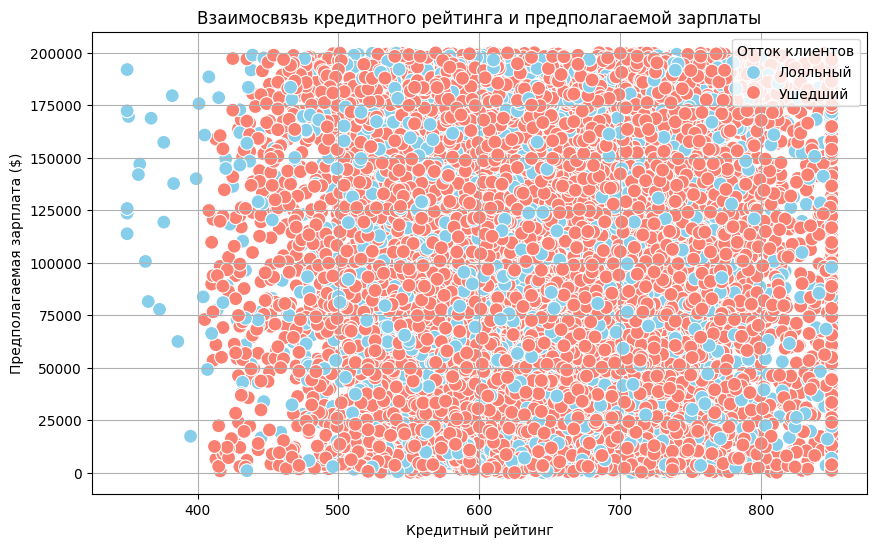

In [45]:
# Создание графика
plt.figure(figsize=(10, 6))
sns.scatterplot(data=churn_data, x='CreditScore', y='EstimatedSalary', hue='Exited', palette={0: 'salmon', 1: 'skyblue'}, s=100)

# Настройка графика
plt.title('Взаимосвязь кредитного рейтинга и предполагаемой зарплаты')
plt.xlabel('Кредитный рейтинг')
plt.ylabel('Предполагаемая зарплата ($)')
plt.legend(title='Отток клиентов', loc='upper right', labels=['Лояльный', 'Ушедший'])
plt.grid(True)
plt.show('png')

**Вывод**

На графике представлена взаимосвязь кредитного рейтинга и предполагаемой зарплаты клиентов. Расцветка графика показывает, как клиенты с разными кредитными рейтингами и зарплатами отображены в зависимости от статуса (лояльный или ушедший). Взаимосвязь между признаками клиентов не выявлена. Однако обращают внимание клиенты с высокой зарплатой и низким кредитным рейтингом, вероятно, в банке для них есть подходящий спектр услуг.
Клиенты с высокими кредитными рейтингами и зарплатами имеют больше шансов оттока, вероятно, в банке нет или недостаточного качества обслуживание вип-клиентов

## <center>**6 вопрос**</center>
Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

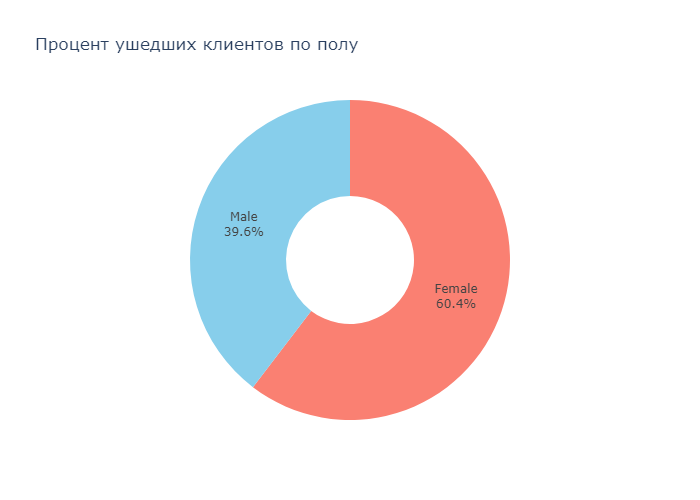

In [46]:
# Расчет среднего значения по столбцу Exited для каждой группы Gender
gender_exit_rate = churn_data.groupby('Gender')['Exited'].mean() * 100  # Процент ушедших клиентов

# Преобразуем в DataFrame для Plotly
gender_exit_rate_df = gender_exit_rate.reset_index()
gender_exit_rate_df.columns = ['Gender', 'Exit Rate (%)']

# Создание пончиковой диаграммы
fig = px.pie(
    gender_exit_rate_df,
    values='Exit Rate (%)',
    names='Gender',
    title='Процент ушедших клиентов по полу',
    hole=0.4,  # Размер отверстия в центре пончика
    color='Gender',
    color_discrete_sequence=['salmon', 'skyblue']
)

# Настройка графика
fig.update_traces(textinfo='percent+label')  # Отображение процентов и меток
fig.update_layout(showlegend=False)

# Отображение графика
fig.show('png')

**Вывод**

Женщины составляют большую часть ушедших клиентов, 60,4%

## <center>**7 вопрос**</center>
Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

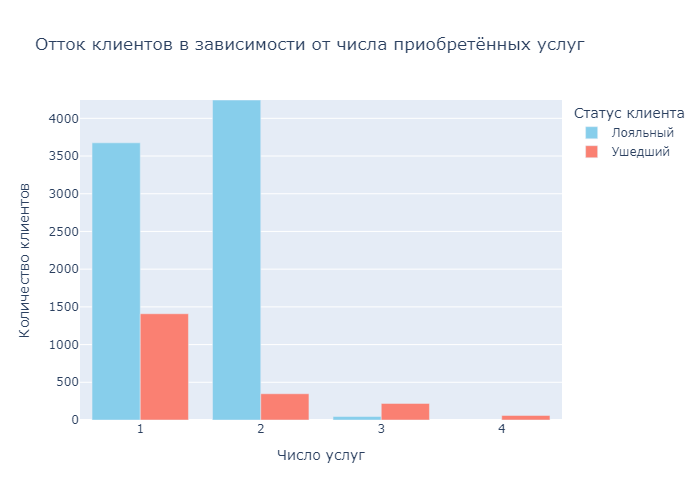

In [47]:
# Группировка данных по числу продуктов и статусу клиента
exit_counts = churn_data.groupby(['NumOfProducts', 'Exited']).size().reset_index(name='Count')

# Преобразование статуса в удобный формат
exit_counts['Exited'] = exit_counts['Exited'].map({0: 'Лояльный', 1: 'Ушедший'})

# Создание многоуровневой столбчатой диаграммы
fig = px.bar(
    exit_counts,
    x='NumOfProducts',
    y='Count',
    color='Exited',
    barmode='group',
    title='Отток клиентов в зависимости от числа приобретённых услуг',
    labels={'Count': 'Количество клиентов', 'NumOfProducts': 'Число услуг'},
    color_discrete_sequence=['skyblue', 'salmon']
)

# Настройка графика
fig.update_layout(
    xaxis_title='Число услуг',
    yaxis_title='Количество клиентов',
    yaxis=dict(range=[0, exit_counts['Count'].max() + 1]),
    legend_title='Статус клиента'
)

# Отображение графика
fig.show('png')

**Вывод**

По данным графика ушедщие клиенты получали большее количество услуг, чем лояльные. Есть вероятность, что качество обслуживания было низким, либо обслуживающий персонал недостаточно тренирован.

## <center>**8 вопрос**</center>
Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

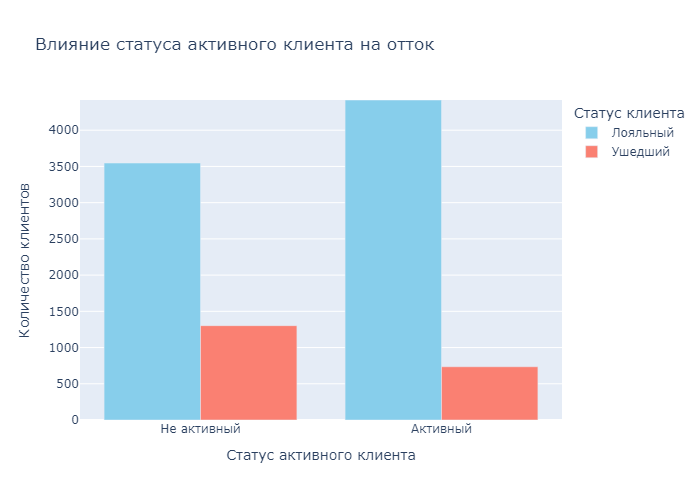

In [48]:
# Группировка данных по статусу активного клиента и оттоку
exit_counts = churn_data.groupby(['IsActiveMember', 'Exited']).size().reset_index(name='Count')

# Преобразование статуса в удобный формат
exit_counts['Exited'] = exit_counts['Exited'].map({0: 'Лояльный', 1: 'Ушедший'})
exit_counts['IsActiveMember'] = exit_counts['IsActiveMember'].map({0: 'Не активный', 1: 'Активный'})

# Создание столбчатой диаграммы
fig = px.bar(
    exit_counts,
    x='IsActiveMember',
    y='Count',
    color='Exited',
    barmode='group',
    title='Влияние статуса активного клиента на отток',
    labels={'Count': 'Количество клиентов', 'IsActiveMember': 'Статус активного клиента'},
    color_discrete_sequence=['skyblue', 'salmon']
)

# Настройка графика
fig.update_layout(
    xaxis_title='Статус активного клиента',
    yaxis_title='Количество клиентов',
    yaxis=dict(range=[0, exit_counts['Count'].max() + 1]),
    legend_title='Статус клиента'
)

# Отображение графика
fig.show('png')

**Вывод**

По данным графика лояльные клиенты были более активными. Вероятно, банку стоит усилить работу pr-отдела для разработки спецпредложений или услуг для увеличения активности клиентов.

## <center>**9 вопрос**</center>
В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [49]:
# Группировка данных по стране и подсчет ушедших клиентов
churn_summary = churn_data.groupby('Geography').agg(
    TotalClients=('Exited', 'count'),
    ExitedClients=('Exited', 'sum')
).reset_index()

# Расчет доли ушедших клиентов
churn_summary['ChurnRate'] = churn_summary['ExitedClients'] / churn_summary['TotalClients']

# Создание тепловой картограммы
fig = px.choropleth(
    churn_summary,
    locations='Geography',  # Страна
    locationmode='country names',  # Режим наименований стран
    color='ChurnRate',  # Доля ушедших клиентов
    hover_name='Geography',  # Подсказка при наведении
    color_continuous_scale=px.colors.sequential.Plasma,  # Цветовая шкала
    title='Доля ушедших клиентов по странам',
    labels={'ChurnRate': 'Доля ушедших клиентов'}
)

# Настройка графика
fig.update_geos(showcoastlines=True, coastlinecolor='Black')
fig.update_layout(title_x=0.5)

# Отображение графика
fig.show()

**Вывод**

По данным графика выше доля ушедших клиентов в Германии - 0,32. Вероятно, это связано с большой конкуренцией среди банков и наличием лучшего сервиса и продуктов в банках-конкурентах

## <center>**10 вопрос**</center>
Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.

На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

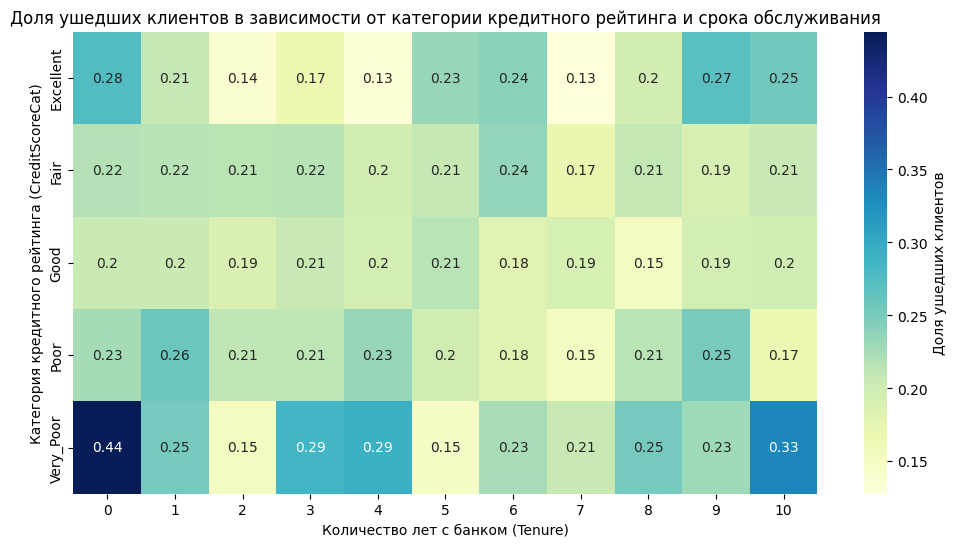

In [50]:
def get_credit_score_cat(credit_score: int) -> str:
    """
    Определяет категорию кредитного рейтинга на основе его числового значения.

    Аргументы:
    credit_score (int): Кредитный рейтинг, который нужно классифицировать.
    
    Возвращает:
    str: Категория кредитного рейтинга:
        - "Very_Poor": 300 <= credit_score < 500
        - "Poor": 500 <= credit_score < 601
        - "Fair": 601 <= credit_score < 661
        - "Good": 661 <= credit_score < 781
        - "Excellent": 781 <= credit_score < 851
        - "Top": credit_score >= 851
        - "Deep": credit_score < 300
    """
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
    
# Применение функции к столбцу CreditScore и создание нового столбца CreditScoreCat
churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)

# Создание сводной таблицы
pivot_table = churn_data.pivot_table(values='Exited', 
                             index='CreditScoreCat', 
                             columns='Tenure', 
                             aggfunc='mean')

# Построение тепловой карты
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', cbar_kws={'label': 'Доля ушедших клиентов'})
plt.title('Доля ушедших клиентов в зависимости от категории кредитного рейтинга и срока обслуживания')
plt.xlabel('Количество лет с банком (Tenure)')
plt.ylabel('Категория кредитного рейтинга (CreditScoreCat)')
plt.show('png')


**Вывод**

Чаще всего уходят клиенты с низким кредитным рейтингом. Больше всего таких клиентов среди новых, до года со дня первичного обращения в банк.